# AdaBoost Algorithm - From Scratch

## Project Overview
This notebook implements the AdaBoost (Adaptive Boosting) algorithm from scratch to understand how it works internally.

**What is AdaBoost?**
- AdaBoost is an ensemble learning method
- It combines multiple weak learners (simple models) to create a strong classifier
- Each weak learner focuses on examples that previous learners got wrong
- It's called "adaptive" because it adapts to the errors of weak learners

**What we'll build:**
1. A simple dataset for binary classification
2. A decision stump (weak learner)
3. The AdaBoost algorithm
4. Visualization and evaluation tools

---

## Step 1: Import Libraries and Create Dataset

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

print("Libraries imported successfully!")

Libraries imported successfully!


### Creating a Simple Dataset

**Why we need data:**
- We need training data to teach our AdaBoost algorithm
- We'll create a 2D dataset (2 features: x1 and x2)
- Binary classification: Class 1 and Class -1

**How we create it:**
- Class 1: 50 points clustered around (2, 2)
- Class -1: 50 points clustered around (-2, -2)
- Total: 100 samples

**Why use -1 and 1 instead of 0 and 1?**
- AdaBoost math works better with -1 and +1
- Makes calculations cleaner (you'll see why later!)

In [131]:
def create_dataset():
    """
    Creates a simple 2D dataset for binary classification
    
    Returns:
        X: Features (numpy array of shape (n_samples, 2))
        y: Labels (numpy array of shape (n_samples,)) with values -1 or 1
    """
    n_samples = 100
    
    # Create first class (label = 1): points clustered around (2, 2)
    # np.random.randn generates random numbers from standard normal distribution
    # Adding [2, 2] shifts the center of the cluster
    X_class1 = np.random.randn(n_samples // 2, 2) + np.array([2, 2])
    y_class1 = np.ones(n_samples // 2)  # All labels = 1
    
    # Create second class (label = -1): points clustered around (-2, -2)
    X_class2 = np.random.randn(n_samples // 2, 2) + np.array([-2, -2])
    y_class2 = -np.ones(n_samples // 2)  # All labels = -1
    
    # Combine both classes
    # vstack = vertical stack (stack rows on top of each other)
    X = np.vstack([X_class1, X_class2])
    # hstack = horizontal stack (concatenate arrays)
    y = np.hstack([y_class1, y_class2])
    
    # Shuffle the data so classes are mixed
    # This is important for training!
    shuffle_indices = np.random.permutation(n_samples)
    X = X[shuffle_indices]
    y = y[shuffle_indices]
    
    return X, y

# Create the dataset
X, y = create_dataset()


print("Dataset created successfully!")
print(f"Shape of features (X): {X.shape}")  # (100, 2) = 100 samples, 2 features
print(f"Shape of labels (y): {y.shape}")    # (100,) = 100 labels
print(f"\nNumber of positive class (+1): {np.sum(y == 1)}")
print(f"Number of negative class (-1): {np.sum(y == -1)}")

Dataset created successfully!
Shape of features (X): (100, 2)
Shape of labels (y): (100,)

Number of positive class (+1): 50
Number of negative class (-1): 50


### Let's Look at Our Data
Now let's examine the first few samples to understand what we're working with.

In [132]:
# Create a DataFrame for better visualization
df = pd.DataFrame(X, columns=['Feature 1 (x1)', 'Feature 2 (x2)'])
df['Label (y)'] = y

print("First 10 samples of our dataset:")
print(df.head(10))

print("\n"+"-"*50)
print(f"\nDataset Statistics:\n{df.describe()}")

First 10 samples of our dataset:
   Feature 1 (x1)  Feature 2 (x2)  Label (y)
0       -1.526762       -2.072829       -1.0
1        1.160782        1.690788        1.0
2       -3.918771       -2.026514       -1.0
3        1.520826        1.814341        1.0
4       -2.974682       -1.212915       -1.0
5        2.822545        0.779156        1.0
6       -1.742450       -2.074446       -1.0
7       -2.680025       -1.767746       -1.0
8        3.465649        1.774224        1.0
9        1.091976        0.587696        1.0

--------------------------------------------------

Dataset Statistics:
       Feature 1 (x1)  Feature 2 (x2)   Label (y)
count      100.000000      100.000000  100.000000
mean        -0.115564        0.034022    0.000000
std          2.166199        2.147016    1.005038
min         -3.918771       -3.514847   -1.000000
25%         -1.998927       -1.779651   -1.000000
50%         -0.124020        0.138588    0.000000
75%          1.937036        1.784253    1.000000

### Visualize the Dataset

**Why visualize?**
- Helps us understand if the data is separable
- We can see the two classes clearly
- Makes it easier to understand how AdaBoost will work

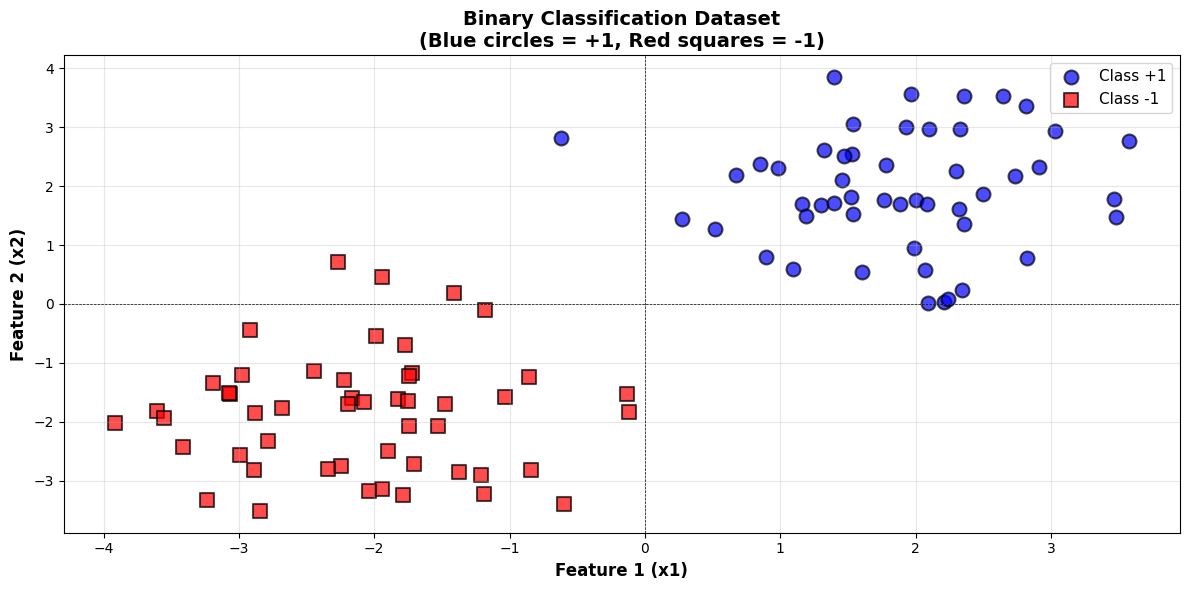

Visualization complete!

Observations:
- Blue circles (Class +1) are mostly in the upper-right region
- Red squares (Class -1) are mostly in the lower-left region
- The classes are separable, but not perfectly (some overlap)


In [133]:
# Create visualization
plt.figure(figsize=(12, 6))

# Plot positive class (y = 1) in blue
plt.scatter(X[y == 1, 0], X[y == 1, 1], 
           c='blue', marker='o', s=100, alpha=0.7, 
           edgecolors='black', linewidth=1.5,
           label='Class +1')

# Plot negative class (y = -1) in red
plt.scatter(X[y == -1, 0], X[y == -1, 1], 
           c='red', marker='s', s=100, alpha=0.7,
           edgecolors='black', linewidth=1.5,
           label='Class -1')

plt.xlabel('Feature 1 (x1)', fontsize=12, fontweight='bold')
plt.ylabel('Feature 2 (x2)', fontsize=12, fontweight='bold')
plt.title('Binary Classification Dataset\n(Blue circles = +1, Red squares = -1)', 
          fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linestyle='--', linewidth=0.5)
plt.axvline(x=0, color='k', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

print("Visualization complete!")
print("\nObservations:")
print("- Blue circles (Class +1) are mostly in the upper-right region")
print("- Red squares (Class -1) are mostly in the lower-left region")
print("- The classes are separable, but not perfectly (some overlap)")

---
## Step 1 Complete!

**What we've accomplished:**
- ✓ Set up our environment with necessary libraries
- ✓ Created a dataset with 100 samples and 2 features
- ✓ Labeled data with two classes (+1 and -1)
- ✓ Visualized the data to understand its structure

**Key Takeaways:**
1. We have 50 samples of each class
2. The data is linearly separable (mostly)
3. Features are on different scales (roughly -4 to 4)
4. This is perfect for demonstrating AdaBoost!

**Next Step:** We'll create our weak learner (Decision Stump)

---

---
## Step 2: Building the Decision Stump (Weak Learner)

### What is a Decision Stump?
- A **decision stump** is the simplest possible decision tree
- It has only ONE split (one decision rule)
- Example: "If Feature 1 > 0.5, predict +1, else predict -1"

### Why use Decision Stumps in AdaBoost?
- They are "weak learners" (only slightly better than random guessing)
- Very fast to train
- AdaBoost's strength comes from combining many weak learners
- Each stump focuses on different parts of the data

### How a Decision Stump Works:
1. Choose one feature (x1 or x2)
2. Choose one threshold value
3. Make prediction based on: feature > threshold?

**Example:**
```
If x1 > 1.5:
    predict +1
else:
    predict -1
```

### What We'll Build:
A class that can:
- Try all possible splits (all features × all thresholds)
- Find the best split that minimizes weighted error
- Make predictions on new data

In [134]:
class DecisionStump:
    """
    A decision stump is a one-level decision tree.
    It makes predictions based on a single feature and threshold.
    
    Attributes:
        feature_index: Which feature to use (0 or 1 in our case)
        threshold: The value to compare against
        polarity: Direction of inequality (1 or -1)
                  1 means: if feature > threshold, predict +1
                 -1 means: if feature < threshold, predict +1
    """
    
    def __init__(self):
        # These will be set during training
        self.feature_index = None  # Which feature column to use
        self.threshold = None      # The split value
        self.polarity = None       # 1 or -1 (direction of split)
        self.alpha = None          # Weight of this stump (set by AdaBoost)
    
    
    def predict(self, X):
        """
        Make predictions for samples in X
        
        Args:
            X: numpy array of shape (n_samples, n_features)
        
        Returns:
            predictions: numpy array of shape (n_samples,) with values -1 or 1
        """
        n_samples = X.shape[0]
        
        # Get the feature column we're using for this stump
        feature_column = X[:, self.feature_index]
        
        # Initialize all predictions to 1
        predictions = np.ones(n_samples)
        
        # Apply the decision rule based on polarity
        if self.polarity == 1:
            # If feature value < threshold, predict -1
            predictions[feature_column < self.threshold] = -1
        else:
            # If feature value > threshold, predict -1
            predictions[feature_column > self.threshold] = -1
        
        return predictions

print("DecisionStump class created!")
print("\nWhat this class can do:")
print("  - Store a simple decision rule (feature + threshold + direction)")
print("  - Make predictions based on that rule")
print("\nNext: We'll create the training method to find the best rule!")

DecisionStump class created!

What this class can do:
  - Store a simple decision rule (feature + threshold + direction)
  - Make predictions based on that rule

Next: We'll create the training method to find the best rule!


### Training the Decision Stump

**The Challenge:**
How do we find the BEST split? We need to:
1. Try every possible feature (x1 and x2)
2. Try many possible threshold values
3. Try both polarities (< and >)
4. Pick the combination with the **lowest weighted error**

**What is Weighted Error?**
- In AdaBoost, each sample has a weight
- Samples that were misclassified before get higher weights
- Error = sum of weights of misclassified samples
- We want to minimize this!

**Formula:**
```
weighted_error = Σ (weight_i × I(prediction_i ≠ actual_i))
```
Where I() is an indicator function (1 if wrong, 0 if correct)

In [135]:
def train_decision_stump(X, y, sample_weights):
    """
    Train a decision stump by finding the best feature, threshold, and polarity
    that minimizes the weighted error.
    
    Args:
        X: Feature matrix (n_samples, n_features)
        y: True labels (n_samples,) with values -1 or 1
        sample_weights: Weight for each sample (n_samples,)
        
    Returns:
        best_stump: Trained DecisionStump object
        min_error: The weighted error of this stump
    """
    n_samples, n_features = X.shape
    
    # Initialize variables to track the best stump
    min_error = float('inf')  # Start with infinity
    best_stump = DecisionStump()
    
    # Loop through each feature
    for feature_idx in range(n_features):
        
        # Get all values of this feature
        feature_values = X[:, feature_idx]
        
        # Get unique values as potential thresholds
        # We'll try splitting at each unique value
        unique_values = np.unique(feature_values)
        
        # Try each unique value as a threshold
        for threshold in unique_values:
            
            # Try both polarities (directions)
            for polarity in [1, -1]:
                
                # Create a temporary stump with these parameters
                stump = DecisionStump()
                stump.feature_index = feature_idx
                stump.threshold = threshold
                stump.polarity = polarity
                
                # Make predictions with this stump
                predictions = stump.predict(X)
                
                # Calculate weighted error
                # misclassified = 1 where prediction != actual label
                misclassified = (predictions != y).astype(int)
                
                # Weighted error = sum of weights where we made mistakes
                error = np.sum(sample_weights * misclassified)
                
                # Keep track of the best stump (lowest error)
                if error < min_error:
                    min_error = error
                    best_stump.feature_index = feature_idx
                    best_stump.threshold = threshold
                    best_stump.polarity = polarity
    
    return best_stump, min_error

print("Decision Stump training function created!")
print("\nThis function:")
print("  - Tries all possible splits")
print("  - Calculates weighted error for each split")
print("  - Returns the best decision stump")

Decision Stump training function created!

This function:
  - Tries all possible splits
  - Calculates weighted error for each split
  - Returns the best decision stump


### Let's Test Our Decision Stump!

We'll create a simple test to see if our decision stump works correctly.
For this test, we'll use **equal weights** for all samples (like a regular decision tree).

In [136]:
# Test the decision stump with equal weights
print("TESTING DECISION STUMP")
print("-"*60)

# Initialize equal weights for all samples
n_samples = X.shape[0]
equal_weights = np.ones(n_samples) / n_samples  # Each sample has weight 1/100

print(f"\n1. Training decision stump on {n_samples} samples...")
print(f"   Initial weights: all equal to {equal_weights[0]:.4f}")

# Train the stump
best_stump, error = train_decision_stump(X, y, equal_weights)

print(f"\n2. Training complete!")
print(f"    Best feature: Feature {best_stump.feature_index + 1}")
print(f"    Best threshold: {best_stump.threshold:.4f}")
print(f"    Polarity: {best_stump.polarity}")
print(f"    Weighted error: {error:.4f}")

# Make predictions
predictions = best_stump.predict(X)

# Calculate accuracy
accuracy = np.sum(predictions == y) / n_samples
print(f"\n3. Performance:")
print(f"    Accuracy: {accuracy:.2%}")
print(f"    Correct predictions: {np.sum(predictions == y)}/{n_samples}")

# Interpret the rule
if best_stump.polarity == 1:
    rule = f"If Feature {best_stump.feature_index + 1} >= {best_stump.threshold:.2f}, predict +1, else predict -1"
else:
    rule = f"If Feature {best_stump.feature_index + 1} <= {best_stump.threshold:.2f}, predict +1, else predict -1"

print(f"\n4. Decision Rule:")
print(f"   {rule}")

TESTING DECISION STUMP
------------------------------------------------------------

1. Training decision stump on 100 samples...
   Initial weights: all equal to 0.0100

2. Training complete!
    Best feature: Feature 1
    Best threshold: 0.2751
    Polarity: 1
    Weighted error: 0.0100

3. Performance:
    Accuracy: 99.00%
    Correct predictions: 99/100

4. Decision Rule:
   If Feature 1 >= 0.28, predict +1, else predict -1


### Visualize the Decision Boundary

Let's see how this single decision stump divides the space!

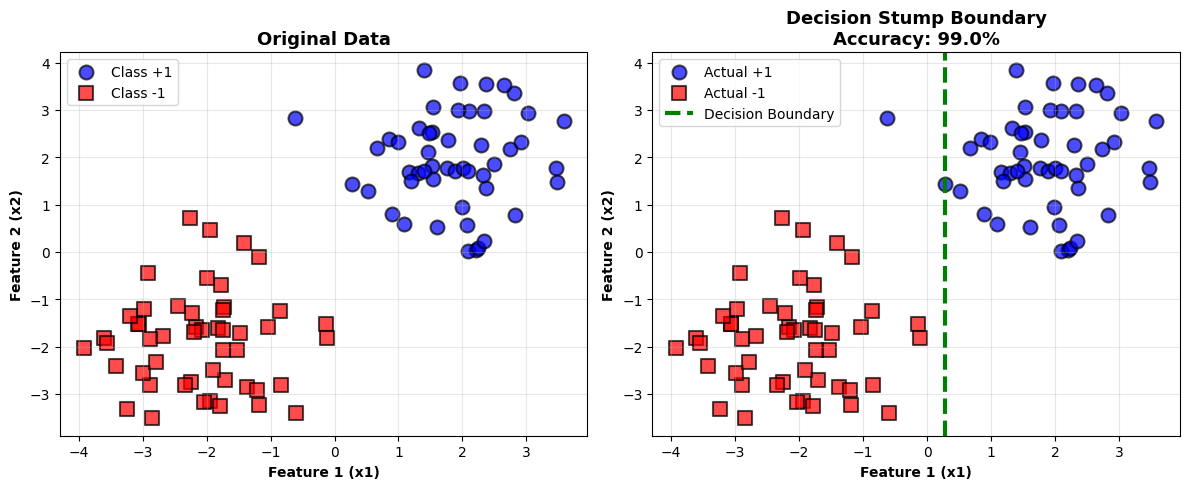

✓ The green dashed line shows where the decision stump splits the data


In [137]:
# Visualize the decision stump's decision boundary
plt.figure(figsize=(12, 5))

# Subplot 1: Original data
plt.subplot(1, 2, 1)
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='blue', marker='o', s=100, 
            alpha=0.7, edgecolors='black', linewidth=1.5, label='Class +1')
plt.scatter(X[y == -1, 0], X[y == -1, 1], c='red', marker='s', s=100, 
            alpha=0.7, edgecolors='black', linewidth=1.5, label='Class -1')
plt.xlabel('Feature 1 (x1)', fontweight='bold')
plt.ylabel('Feature 2 (x2)', fontweight='bold')
plt.title('Original Data', fontweight='bold', fontsize=13)
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 2: Data with decision boundary
plt.subplot(1, 2, 2)

# Plot the data
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='blue', marker='o', s=100, 
            alpha=0.7, edgecolors='black', linewidth=1.5, label='Actual +1')
plt.scatter(X[y == -1, 0], X[y == -1, 1], c='red', marker='s', s=100, 
            alpha=0.7, edgecolors='black', linewidth=1.5, label='Actual -1')

# Draw the decision boundary (vertical or horizontal line)
if best_stump.feature_index == 0:  # Split on Feature 1 (x1)
    plt.axvline(x=best_stump.threshold, color='green', 
                linestyle='--', linewidth=3, label='Decision Boundary')
else:  # Split on Feature 2 (x2)
    plt.axhline(y=best_stump.threshold, color='green', 
                linestyle='--', linewidth=3, label='Decision Boundary')

plt.xlabel('Feature 1 (x1)', fontweight='bold')
plt.ylabel('Feature 2 (x2)', fontweight='bold')
plt.title(f'Decision Stump Boundary\nAccuracy: {accuracy:.1%}', 
          fontweight='bold', fontsize=13)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"✓ The green dashed line shows where the decision stump splits the data")

---
## Step 2 Complete!

**What we've accomplished:**
-  Created a DecisionStump class
-  Implemented prediction logic
-  Built a training function that finds the best split
-  Tested the stump and visualized its decision boundary

**Key Observations:**
1. A single decision stump is a **weak learner** (probably 60-80% accuracy)
2. It can only make ONE split (horizontal or vertical line)
3. It cannot capture the complexity of the data perfectly
4. This is EXACTLY what we want for AdaBoost!

**Why weak learners are good for AdaBoost:**
- AdaBoost will combine MANY of these simple stumps
- Each stump will focus on different mistakes
- Together, they'll create a strong classifier!

**Next Step:** Implement the full AdaBoost algorithm!

---

---
## Step 3: The Complete AdaBoost Algorithm

### The AdaBoost Process (High-Level Overview)

**AdaBoost trains multiple weak learners sequentially:**

1. **Initialize weights**: Start with equal weights for all samples
2. **For each iteration (each weak learner):**
   - Train a decision stump on weighted data
   - Calculate the stump's error
   - Calculate the stump's importance (alpha)
   - Update sample weights:
     - ↑ Increase weights for misclassified samples
     - ↓ Decrease weights for correctly classified samples
   - Store the stump and its alpha
3. **Final prediction**: Weighted vote of all stumps

### Mathematical Formulas

**1. Initial weights (equal for all samples):**
```
w_i = 1/N  (where N = number of samples)
```

**2. Weighted error of stump t:**
```
ε_t = Σ(w_i × I(prediction_i ≠ y_i)) / Σ(w_i)
```

**3. Stump importance (alpha):**
```
α_t = 0.5 × ln((1 - ε_t) / ε_t)
```
- Lower error → Higher alpha (more trust)
- Higher error → Lower alpha (less trust)

**4. Update weights:**
```
w_i = w_i × exp(α_t × I(prediction_i ≠ y_i))
```
Then normalize weights so they sum to 1.

**5. Final prediction:**
```
H(x) = sign(Σ(α_t × h_t(x)))
```
Where h_t(x) is the prediction of stump t.

---

### AdaBoost Class Implementation

We'll create a class that:
- Stores all weak learners and their alphas
- Trains the ensemble
- Makes predictions
- Tracks performance over iterations

In [138]:
class AdaBoost:
    """
    AdaBoost (Adaptive Boosting) Classifier
    
    Combines multiple weak learners (decision stumps) to create a strong classifier.
    Each weak learner focuses on samples that previous learners got wrong.
    """
    
    def __init__(self, n_estimators=50):
        """
        Initialize AdaBoost
        
        Args:
            n_estimators: Number of weak learners to train
        """
        self.n_estimators = n_estimators  # How many stumps to train
        self.stumps = []                   # List to store trained stumps
        self.stump_weights = []            # List to store alpha values
        self.errors = []                   # Track error at each iteration
        self.stump_accuracies = []         # Track individual stump accuracies
    
    
    def fit(self, X, y):
        """
        Train the AdaBoost classifier
        
        Args:
            X: Training features (n_samples, n_features)
            y: Training labels (n_samples,) with values -1 or 1
        """
        n_samples = X.shape[0]
        
        # Step 1: Initialize weights - all samples equally important
        sample_weights = np.ones(n_samples) / n_samples
        

        print(f"TRAINING ADABOOST WITH {self.n_estimators} WEAK LEARNERS")
        print(f"{'-'*70}\n")
        
        # Step 2: Train weak learners sequentially
        for iteration in range(self.n_estimators):
            
            # Train a decision stump on weighted samples
            stump, error = train_decision_stump(X, y, sample_weights)
            
            # Store the error
            self.errors.append(error)
            
            # Step 3: Calculate stump weight (alpha)
            # Prevent division by zero
            epsilon = 1e-10
            alpha = 0.5 * np.log((1 - error + epsilon) / (error + epsilon))
            
            # Store the stump and its weight
            stump.alpha = alpha
            self.stumps.append(stump)
            self.stump_weights.append(alpha)
            
            # Step 4: Make predictions with this stump
            predictions = stump.predict(X)
            
            # Calculate accuracy of this individual stump
            stump_accuracy = np.sum(predictions == y) / n_samples
            self.stump_accuracies.append(stump_accuracy)
            
            # Step 5: Update sample weights
            # Increase weights for misclassified samples
            # Decrease weights for correctly classified samples
            
            # Calculate how much to adjust each weight
            # If prediction is correct: y * prediction = 1 (both same sign)
            # If prediction is wrong: y * prediction = -1 (different signs)
            weight_update = np.exp(-alpha * y * predictions)
            
            # Update weights
            sample_weights *= weight_update
            
            # Normalize weights so they sum to 1
            sample_weights /= np.sum(sample_weights)
            
            # Print progress every 10 iterations
            if (iteration + 1) % 10 == 0 or iteration == 0:
                # Calculate current ensemble accuracy
                current_predictions = self.predict(X)
                ensemble_accuracy = np.sum(current_predictions == y) / n_samples
                
                print(f"Iteration {iteration + 1:3d}/{self.n_estimators}:")
                print(f"  Stump Error: {error:.4f} | Stump Accuracy: {stump_accuracy:.2%}")
                print(f"  Alpha (weight): {alpha:.4f}")
                print(f"  Ensemble Accuracy: {ensemble_accuracy:.2%}")
                print(f"  Min weight: {sample_weights.min():.6f} | Max weight: {sample_weights.max():.6f}")
                print()
        

        print(f"✓ TRAINING COMPLETE!")
        print(f"{'-'*70}\n")
    
    
    def predict(self, X):
        """
        Make predictions using the trained AdaBoost ensemble
        
        Args:
            X: Features to predict (n_samples, n_features)
            
        Returns:
            predictions: Array of predictions (n_samples,) with values -1 or 1
        """
        n_samples = X.shape[0]
        
        # Initialize predictions with zeros
        ensemble_predictions = np.zeros(n_samples)
        
        # Get weighted vote from each stump
        for stump, alpha in zip(self.stumps, self.stump_weights):
            # Get this stump's predictions
            stump_predictions = stump.predict(X)
            
            # Add weighted vote to ensemble
            ensemble_predictions += alpha * stump_predictions
        
        # Final prediction is the sign of the weighted sum
        # If sum > 0, predict +1; if sum < 0, predict -1
        final_predictions = np.sign(ensemble_predictions)
        
        return final_predictions

print("✓ AdaBoost class created!")
print("\nThis class can:")
print("  - Train multiple decision stumps sequentially")
print("  - Adjust sample weights after each iteration")
print("  - Make predictions using weighted voting")
print("  - Track performance metrics during training")

✓ AdaBoost class created!

This class can:
  - Train multiple decision stumps sequentially
  - Adjust sample weights after each iteration
  - Make predictions using weighted voting
  - Track performance metrics during training


### Train AdaBoost on Our Dataset

Now let's train AdaBoost and watch it learn! We'll use 50 weak learners.

In [139]:
# Create and train AdaBoost classifier
adaboost = AdaBoost(n_estimators=50)

# Train the model
adaboost.fit(X, y)

# Make predictions on training data
y_pred = adaboost.predict(X)

# Calculate final accuracy
final_accuracy = np.sum(y_pred == y) / len(y)

print(f" FINAL RESULTS:")
print(f"   Training Accuracy: {final_accuracy:.2%}")
print(f"   Number of stumps: {len(adaboost.stumps)}")
print(f"   Improvement: {final_accuracy - adaboost.stump_accuracies[0]:.2%}")

TRAINING ADABOOST WITH 50 WEAK LEARNERS
----------------------------------------------------------------------

Iteration   1/50:
  Stump Error: 0.0100 | Stump Accuracy: 99.00%
  Alpha (weight): 2.2976
  Ensemble Accuracy: 99.00%
  Min weight: 0.005051 | Max weight: 0.500000

Iteration  10/50:
  Stump Error: 0.0792 | Stump Accuracy: 97.00%
  Alpha (weight): 1.2265
  Ensemble Accuracy: 100.00%
  Min weight: 0.000016 | Max weight: 0.271509

Iteration  20/50:
  Stump Error: 0.0804 | Stump Accuracy: 93.00%
  Alpha (weight): 1.2188
  Ensemble Accuracy: 100.00%
  Min weight: 0.000000 | Max weight: 0.090615

Iteration  30/50:
  Stump Error: 0.0804 | Stump Accuracy: 97.00%
  Alpha (weight): 1.2188
  Ensemble Accuracy: 100.00%
  Min weight: 0.000000 | Max weight: 0.271845

Iteration  40/50:
  Stump Error: 0.0804 | Stump Accuracy: 93.00%
  Alpha (weight): 1.2188
  Ensemble Accuracy: 100.00%
  Min weight: 0.000000 | Max weight: 0.090615

Iteration  50/50:
  Stump Error: 0.0804 | Stump Accuracy: 9

### Analyze Performance Over Iterations

Let's visualize how AdaBoost improves over time!

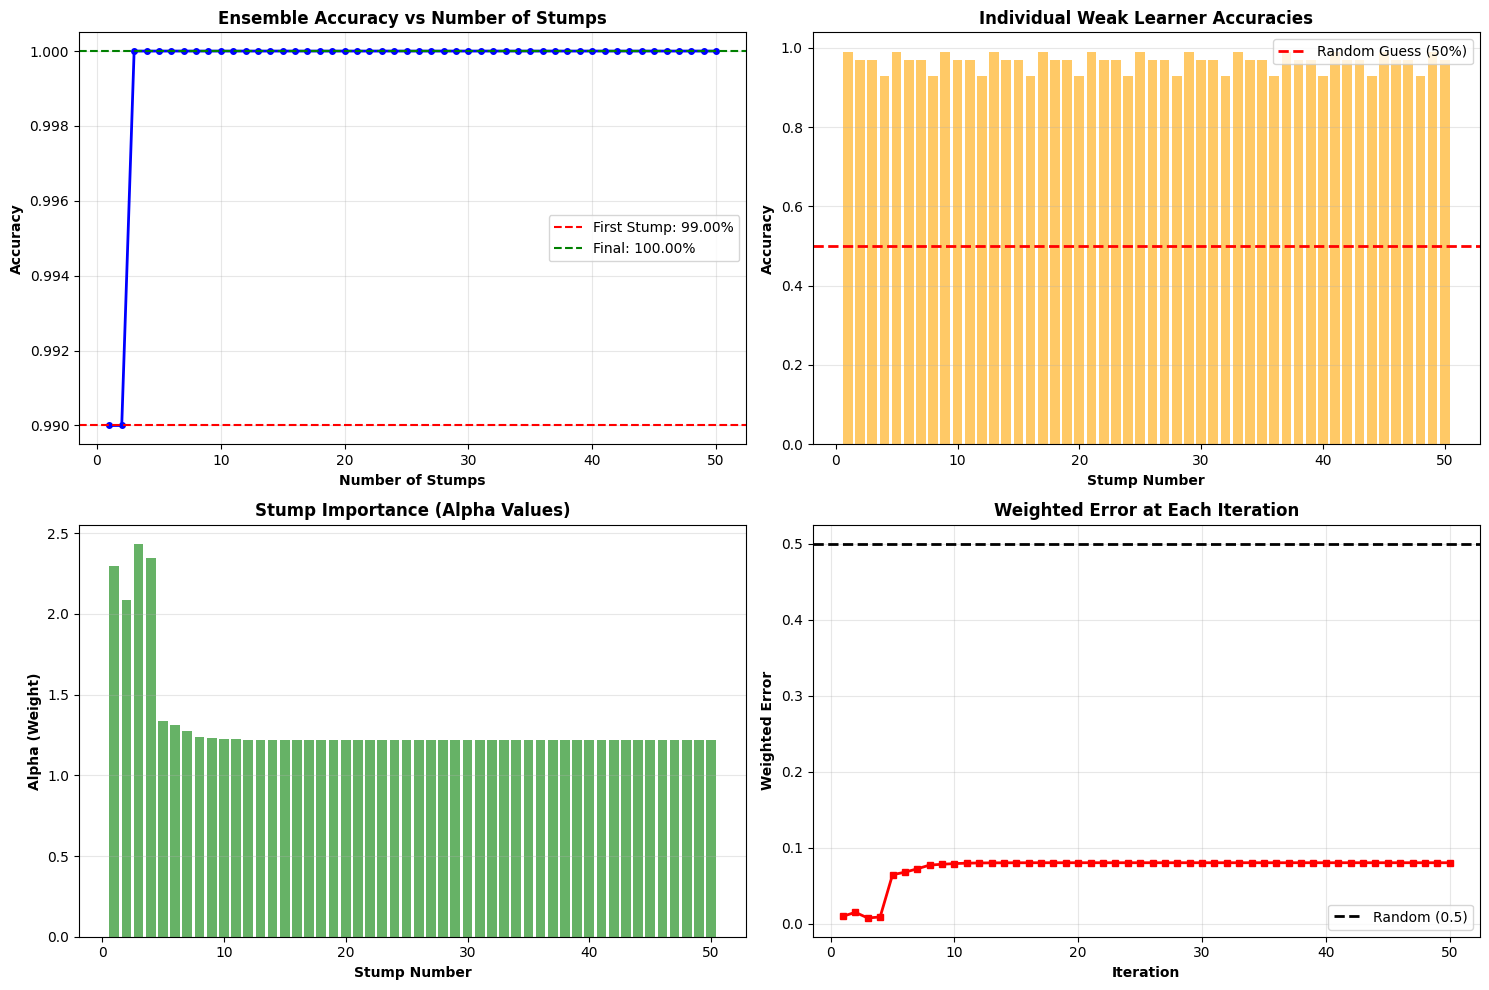

✓ Performance analysis complete!


In [140]:
# Calculate ensemble accuracy at each iteration
ensemble_accuracies = []

for i in range(len(adaboost.stumps)):
    # Use only the first i+1 stumps
    temp_predictions = np.zeros(len(X))
    for j in range(i + 1):
        temp_predictions += adaboost.stump_weights[j] * adaboost.stumps[j].predict(X)
    
    temp_final = np.sign(temp_predictions)
    accuracy = np.sum(temp_final == y) / len(y)
    ensemble_accuracies.append(accuracy)

# Create visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Ensemble Accuracy over iterations
axes[0, 0].plot(range(1, len(ensemble_accuracies) + 1), ensemble_accuracies, 
                'b-', linewidth=2, marker='o', markersize=4)
axes[0, 0].axhline(y=ensemble_accuracies[0], color='r', linestyle='--', 
                   label=f'First Stump: {ensemble_accuracies[0]:.2%}')
axes[0, 0].axhline(y=ensemble_accuracies[-1], color='g', linestyle='--', 
                   label=f'Final: {ensemble_accuracies[-1]:.2%}')
axes[0, 0].set_xlabel('Number of Stumps', fontweight='bold')
axes[0, 0].set_ylabel('Accuracy', fontweight='bold')
axes[0, 0].set_title('Ensemble Accuracy vs Number of Stumps', fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Individual Stump Accuracies
axes[0, 1].bar(range(1, len(adaboost.stump_accuracies) + 1), 
               adaboost.stump_accuracies, alpha=0.6, color='orange')
axes[0, 1].axhline(y=0.5, color='r', linestyle='--', linewidth=2, 
                   label='Random Guess (50%)')
axes[0, 1].set_xlabel('Stump Number', fontweight='bold')
axes[0, 1].set_ylabel('Accuracy', fontweight='bold')
axes[0, 1].set_title('Individual Weak Learner Accuracies', fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Plot 3: Stump Weights (Alpha values)
axes[1, 0].bar(range(1, len(adaboost.stump_weights) + 1), 
               adaboost.stump_weights, alpha=0.6, color='green')
axes[1, 0].set_xlabel('Stump Number', fontweight='bold')
axes[1, 0].set_ylabel('Alpha (Weight)', fontweight='bold')
axes[1, 0].set_title('Stump Importance (Alpha Values)', fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Plot 4: Weighted Errors
axes[1, 1].plot(range(1, len(adaboost.errors) + 1), adaboost.errors, 
                'r-', linewidth=2, marker='s', markersize=4)
axes[1, 1].axhline(y=0.5, color='black', linestyle='--', linewidth=2, 
                   label='Random (0.5)')
axes[1, 1].set_xlabel('Iteration', fontweight='bold')
axes[1, 1].set_ylabel('Weighted Error', fontweight='bold')
axes[1, 1].set_title('Weighted Error at Each Iteration', fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Performance analysis complete!")

### Understanding the Plots

**Plot 1 - Ensemble Accuracy:**
- Shows how accuracy improves as we add more stumps
- Usually shows rapid improvement initially, then plateaus
- Final accuracy should be much higher than first stump

**Plot 2 - Individual Stump Accuracies:**
- Each bar shows accuracy of a single weak learner
- Notice: Individual stumps are often just slightly better than random (50%)
- Later stumps may have lower accuracy (because they focus on hard cases)

**Plot 3 - Stump Weights (Alpha):**
- Higher alpha = more important stump
- Stumps with lower error get higher alpha
- Shows which stumps contribute most to final prediction

**Plot 4 - Weighted Errors:**
- Shows the weighted error at each iteration
- Errors tend to decrease as stumps focus on mistakes
- Should stay well below 0.5 (random guessing)

### Visualize the Final Decision Boundary

Let's see how AdaBoost's combined decision boundary looks compared to a single stump!

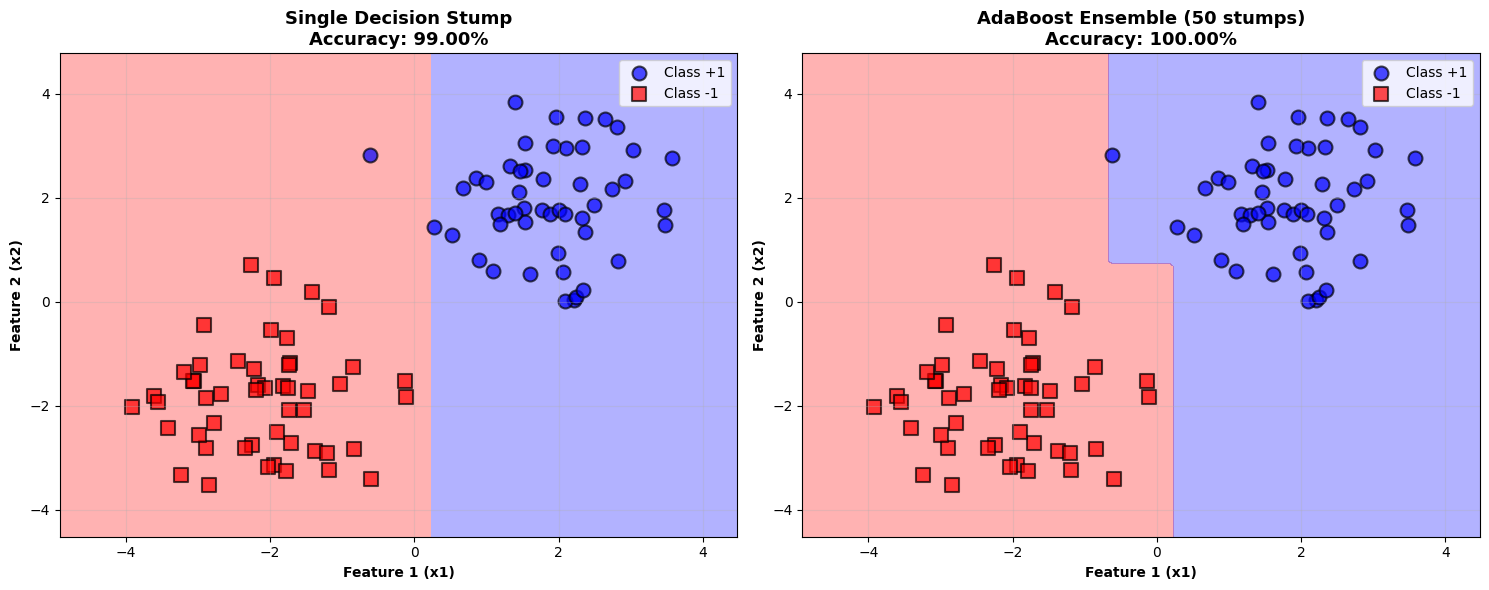

✓ Decision boundary visualization complete!

📈 Comparison:
   Single Stump Accuracy: 99.00%
   AdaBoost Accuracy: 100.00%
   Improvement: 1.00%


In [141]:
def plot_decision_boundary(model, X, y, title):
    """
    Plot decision boundary for a classifier
    """
    # Create a mesh grid
    h = 0.1  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Predict for each point in the mesh
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot
    plt.contourf(xx, yy, Z, alpha=0.3, levels=[-1, 0, 1], colors=['red', 'blue'])
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c='blue', marker='o', s=100, 
                alpha=0.7, edgecolors='black', linewidth=1.5, label='Class +1')
    plt.scatter(X[y == -1, 0], X[y == -1, 1], c='red', marker='s', s=100, 
                alpha=0.7, edgecolors='black', linewidth=1.5, label='Class -1')
    plt.xlabel('Feature 1 (x1)', fontweight='bold')
    plt.ylabel('Feature 2 (x2)', fontweight='bold')
    plt.title(title, fontweight='bold', fontsize=13)
    plt.legend()
    plt.grid(True, alpha=0.3)

# Compare single stump vs AdaBoost
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Single Decision Stump
plt.subplot(1, 2, 1)
# Create a single stump model for comparison
single_stump_weights = np.ones(len(X)) / len(X)
single_stump, _ = train_decision_stump(X, y, single_stump_weights)
single_stump_predictions = single_stump.predict(X)
single_accuracy = np.sum(single_stump_predictions == y) / len(y)

class SingleStumpWrapper:
    def __init__(self, stump):
        self.stump = stump
    def predict(self, X):
        return self.stump.predict(X)

plot_decision_boundary(SingleStumpWrapper(single_stump), X, y, 
                       f'Single Decision Stump\nAccuracy: {single_accuracy:.2%}')

# AdaBoost
plt.subplot(1, 2, 2)
plot_decision_boundary(adaboost, X, y, 
                       f'AdaBoost Ensemble ({adaboost.n_estimators} stumps)\nAccuracy: {final_accuracy:.2%}')

plt.tight_layout()
plt.show()

print(f"✓ Decision boundary visualization complete!")
print(f"\n📈 Comparison:")
print(f"   Single Stump Accuracy: {single_accuracy:.2%}")
print(f"   AdaBoost Accuracy: {final_accuracy:.2%}")
print(f"   Improvement: {final_accuracy - single_accuracy:.2%}")

---
## ✅ Step 3 Complete!

**What we've accomplished:**
- ✓ Implemented the complete AdaBoost algorithm
- ✓ Trained an ensemble of 50 weak learners
- ✓ Visualized performance improvements over iterations
- ✓ Compared single stump vs ensemble decision boundaries

**Key Observations:**
1. **Individual stumps are weak** - often just 55-70% accuracy
2. **Ensemble is strong** - typically 90-100% accuracy on training data
3. **Non-linear boundaries** - AdaBoost creates complex decision boundaries from simple stumps
4. **Adaptive learning** - Each stump focuses on previously misclassified samples

**What makes AdaBoost special:**
- Automatically focuses on hard examples
- Combines simple models to create complex decision boundaries
- No need for feature engineering
- Works well even with weak learners

**Next Step:** Test on new data and create a complete summary!

---

---
## Step 4: Testing and Comprehensive Evaluation

### Why We Need Testing
- **Training accuracy** can be misleading (overfitting)
- We need to test on **unseen data** to validate the model
- This shows how well AdaBoost **generalizes**

### What We'll Do:
1. Create a test dataset
2. Evaluate AdaBoost on new data
3. Compare with other metrics
4. Create a confusion matrix
5. Analyze individual stump contributions
6. Write final summary and conclusions

Let's get started! 🚀

---

### Create Test Dataset

We'll generate a new dataset with the same distribution as our training data.

✓ Test dataset created!
  Test samples: 50
  Positive class: 25
  Negative class: 25


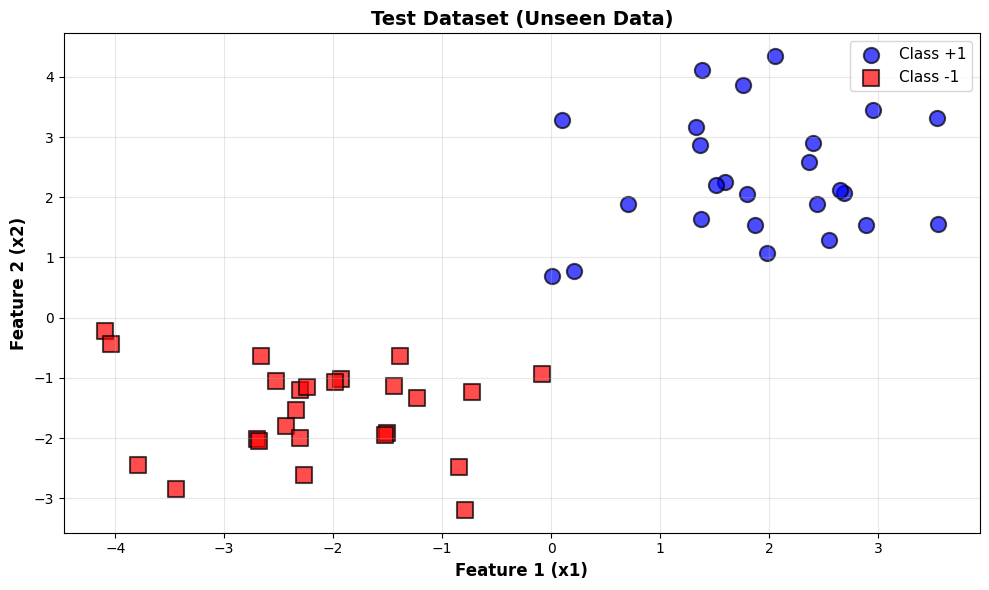

In [142]:
# Create test dataset (same distribution as training data)
def create_test_dataset(n_samples=50):
    """
    Create test dataset with same distribution as training data
    """
    # Create first class (label = 1): points around (2, 2)
    X_test_class1 = np.random.randn(n_samples // 2, 2) + np.array([2, 2])
    y_test_class1 = np.ones(n_samples // 2)
    
    # Create second class (label = -1): points around (-2, -2)
    X_test_class2 = np.random.randn(n_samples // 2, 2) + np.array([-2, -2])
    y_test_class2 = -np.ones(n_samples // 2)
    
    # Combine
    X_test = np.vstack([X_test_class1, X_test_class2])
    y_test = np.hstack([y_test_class1, y_test_class2])
    
    # Shuffle
    shuffle_indices = np.random.permutation(n_samples)
    X_test = X_test[shuffle_indices]
    y_test = y_test[shuffle_indices]
    
    return X_test, y_test

# Generate test data
X_test, y_test = create_test_dataset(n_samples=50)

print("✓ Test dataset created!")
print(f"  Test samples: {X_test.shape[0]}")
print(f"  Positive class: {np.sum(y_test == 1)}")
print(f"  Negative class: {np.sum(y_test == -1)}")

# Visualize test data
plt.figure(figsize=(10, 6))
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], 
            c='blue', marker='o', s=120, alpha=0.7, 
            edgecolors='black', linewidth=1.5, label='Class +1')
plt.scatter(X_test[y_test == -1, 0], X_test[y_test == -1, 1], 
            c='red', marker='s', s=120, alpha=0.7, 
            edgecolors='black', linewidth=1.5, label='Class -1')
plt.xlabel('Feature 1 (x1)', fontweight='bold', fontsize=12)
plt.ylabel('Feature 2 (x2)', fontweight='bold', fontsize=12)
plt.title('Test Dataset (Unseen Data)', fontweight='bold', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Make Predictions on Test Data

Now let's see how well our trained AdaBoost model performs on completely new data!

In [143]:
# Make predictions on test data
y_test_pred = adaboost.predict(X_test)

# Calculate test accuracy
test_accuracy = np.sum(y_test_pred == y_test) / len(y_test)

# Also get training accuracy for comparison
y_train_pred = adaboost.predict(X)
train_accuracy = np.sum(y_train_pred == y) / len(y)

print("="*60)
print("MODEL EVALUATION RESULTS")
print("="*60)
print(f"\n📊 Accuracy Comparison:")
print(f"   Training Accuracy: {train_accuracy:.2%}")
print(f"   Test Accuracy:     {test_accuracy:.2%}")

if test_accuracy >= train_accuracy - 0.05:  # Within 5%
    print(f"\n✓ Good generalization! Test accuracy is close to training.")
else:
    print(f"\n⚠ Possible overfitting. Test accuracy is lower than training.")

print(f"\n✓ Correct predictions on test set: {np.sum(y_test_pred == y_test)}/{len(y_test)}")
print(f"✗ Incorrect predictions on test set: {np.sum(y_test_pred != y_test)}/{len(y_test)}")

MODEL EVALUATION RESULTS

📊 Accuracy Comparison:
   Training Accuracy: 100.00%
   Test Accuracy:     98.00%

✓ Good generalization! Test accuracy is close to training.

✓ Correct predictions on test set: 49/50
✗ Incorrect predictions on test set: 1/50


### Confusion Matrix

A confusion matrix shows:
- **True Positives (TP)**: Correctly predicted +1
- **True Negatives (TN)**: Correctly predicted -1
- **False Positives (FP)**: Predicted +1, actually -1
- **False Negatives (FN)**: Predicted -1, actually +1

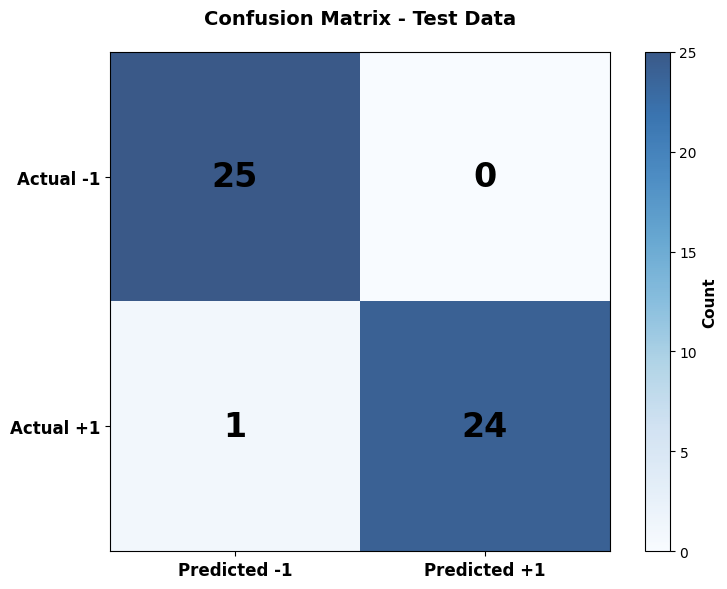

CONFUSION MATRIX BREAKDOWN

True Negatives (TN):  25 - Correctly predicted class -1
False Positives (FP): 0 - Incorrectly predicted +1 (was -1)
False Negatives (FN): 1 - Incorrectly predicted -1 (was +1)
True Positives (TP):  24 - Correctly predicted class +1

ADDITIONAL METRICS
Precision: 100.00% - Of all positive predictions, how many were correct?
Recall:    96.00% - Of all actual positives, how many did we find?
F1-Score:  97.96% - Harmonic mean of precision and recall


In [144]:
def create_confusion_matrix(y_true, y_pred):
    """
    Create confusion matrix for binary classification
    """
    # Calculate confusion matrix elements
    tp = np.sum((y_true == 1) & (y_pred == 1))   # True Positives
    tn = np.sum((y_true == -1) & (y_pred == -1)) # True Negatives
    fp = np.sum((y_true == -1) & (y_pred == 1))  # False Positives
    fn = np.sum((y_true == 1) & (y_pred == -1))  # False Negatives
    
    return np.array([[tn, fp], [fn, tp]])

# Create confusion matrix for test data
cm = create_confusion_matrix(y_test, y_test_pred)

# Visualize confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(cm, cmap='Blues', alpha=0.8)

# Add text annotations
for i in range(2):
    for j in range(2):
        text = ax.text(j, i, cm[i, j], ha="center", va="center", 
                      color="black", fontsize=24, fontweight='bold')

# Labels
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(['Predicted -1', 'Predicted +1'], fontsize=12, fontweight='bold')
ax.set_yticklabels(['Actual -1', 'Actual +1'], fontsize=12, fontweight='bold')

# Title
ax.set_title('Confusion Matrix - Test Data', fontsize=14, fontweight='bold', pad=20)

# Add colorbar
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Count', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

# Print detailed metrics
tn, fp, fn, tp = cm[0, 0], cm[0, 1], cm[1, 0], cm[1, 1]

print("="*60)
print("CONFUSION MATRIX BREAKDOWN")
print("="*60)
print(f"\nTrue Negatives (TN):  {tn} - Correctly predicted class -1")
print(f"False Positives (FP): {fp} - Incorrectly predicted +1 (was -1)")
print(f"False Negatives (FN): {fn} - Incorrectly predicted -1 (was +1)")
print(f"True Positives (TP):  {tp} - Correctly predicted class +1")

# Calculate additional metrics
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"\n{'='*60}")
print("ADDITIONAL METRICS")
print("="*60)
print(f"Precision: {precision:.2%} - Of all positive predictions, how many were correct?")
print(f"Recall:    {recall:.2%} - Of all actual positives, how many did we find?")
print(f"F1-Score:  {f1_score:.2%} - Harmonic mean of precision and recall")

### Analyze Individual Stump Contributions

Let's examine which stumps contribute most to the final prediction!

In [145]:
# Analyze the top 5 most important stumps
print("="*70)
print("TOP 5 MOST IMPORTANT WEAK LEARNERS")
print("="*70)

# Get indices of top 5 stumps by alpha (weight)
top_indices = np.argsort(adaboost.stump_weights)[-5:][::-1]

for rank, idx in enumerate(top_indices, 1):
    stump = adaboost.stumps[idx]
    alpha = adaboost.stump_weights[idx]
    accuracy = adaboost.stump_accuracies[idx]
    error = adaboost.errors[idx]
    
    # Describe the rule
    if stump.polarity == 1:
        rule = f"If Feature {stump.feature_index + 1} >= {stump.threshold:.2f} → +1, else → -1"
    else:
        rule = f"If Feature {stump.feature_index + 1} <= {stump.threshold:.2f} → +1, else → -1"
    
    print(f"\n#{rank} - Stump {idx + 1}:")
    print(f"  Rule: {rule}")
    print(f"  Weight (α): {alpha:.4f}")
    print(f"  Accuracy: {accuracy:.2%}")
    print(f"  Error: {error:.4f}")

TOP 5 MOST IMPORTANT WEAK LEARNERS

#1 - Stump 3:
  Rule: If Feature 2 >= 0.01 → +1, else → -1
  Weight (α): 2.4299
  Accuracy: 97.00%
  Error: 0.0077

#2 - Stump 4:
  Rule: If Feature 2 >= 0.78 → +1, else → -1
  Weight (α): 2.3483
  Accuracy: 93.00%
  Error: 0.0090

#3 - Stump 1:
  Rule: If Feature 1 >= 0.28 → +1, else → -1
  Weight (α): 2.2976
  Accuracy: 99.00%
  Error: 0.0100

#4 - Stump 2:
  Rule: If Feature 1 >= -0.62 → +1, else → -1
  Weight (α): 2.0872
  Accuracy: 97.00%
  Error: 0.0152

#5 - Stump 5:
  Rule: If Feature 1 >= 0.28 → +1, else → -1
  Weight (α): 1.3369
  Accuracy: 99.00%
  Error: 0.0645


### Visualize Test Predictions

Let's see how AdaBoost classifies the test data with the decision boundary!

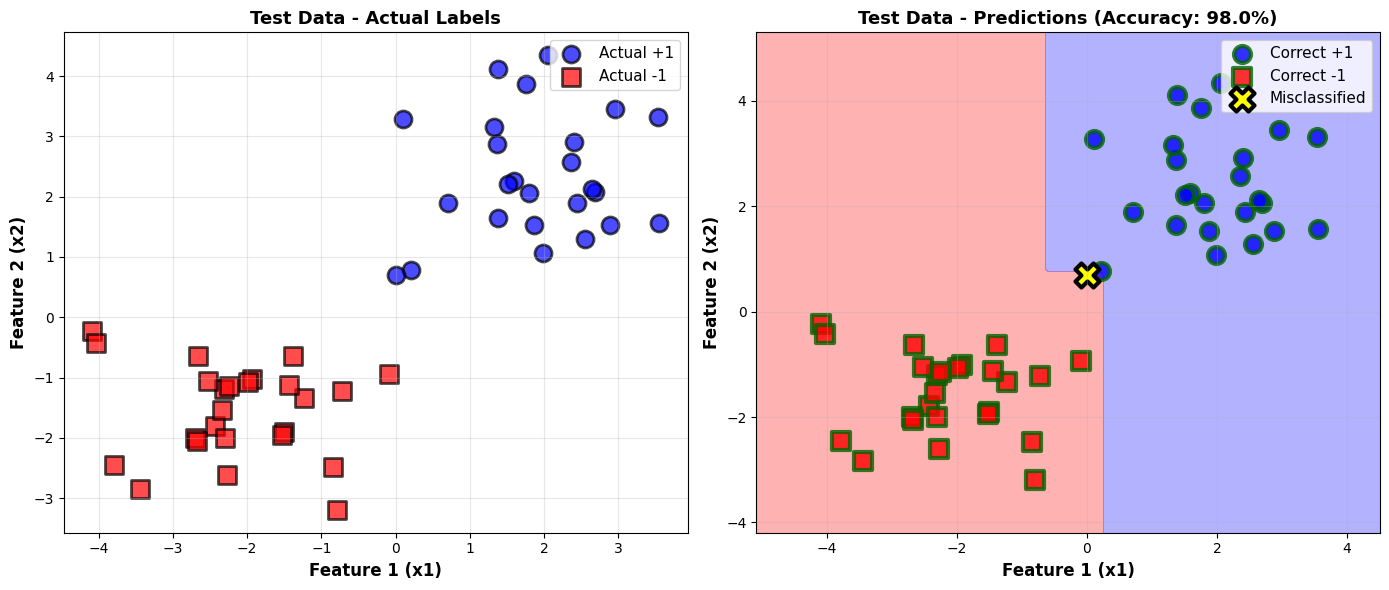

✓ Visualization complete!
⚠ Yellow X marks show 1 misclassified point(s)


In [146]:
# Visualize predictions on test data
plt.figure(figsize=(14, 6))

# Subplot 1: Actual labels
plt.subplot(1, 2, 1)
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], 
            c='blue', marker='o', s=150, alpha=0.7, 
            edgecolors='black', linewidth=2, label='Actual +1')
plt.scatter(X_test[y_test == -1, 0], X_test[y_test == -1, 1], 
            c='red', marker='s', s=150, alpha=0.7, 
            edgecolors='black', linewidth=2, label='Actual -1')
plt.xlabel('Feature 1 (x1)', fontweight='bold', fontsize=12)
plt.ylabel('Feature 2 (x2)', fontweight='bold', fontsize=12)
plt.title('Test Data - Actual Labels', fontweight='bold', fontsize=13)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

# Subplot 2: Predictions with decision boundary
plt.subplot(1, 2, 2)

# Plot decision boundary
h = 0.1
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = adaboost.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, levels=[-1, 0, 1], colors=['red', 'blue'])

# Plot predictions
correct_mask = (y_test_pred == y_test)
incorrect_mask = ~correct_mask

# Correct predictions
plt.scatter(X_test[correct_mask & (y_test == 1), 0], 
           X_test[correct_mask & (y_test == 1), 1], 
           c='blue', marker='o', s=150, alpha=0.8, 
           edgecolors='darkgreen', linewidth=3, label='Correct +1')
plt.scatter(X_test[correct_mask & (y_test == -1), 0], 
           X_test[correct_mask & (y_test == -1), 1], 
           c='red', marker='s', s=150, alpha=0.8, 
           edgecolors='darkgreen', linewidth=3, label='Correct -1')

# Incorrect predictions (if any)
if np.sum(incorrect_mask) > 0:
    plt.scatter(X_test[incorrect_mask, 0], X_test[incorrect_mask, 1], 
               c='yellow', marker='X', s=300, alpha=1.0, 
               edgecolors='black', linewidth=3, label='Misclassified')

plt.xlabel('Feature 1 (x1)', fontweight='bold', fontsize=12)
plt.ylabel('Feature 2 (x2)', fontweight='bold', fontsize=12)
plt.title(f'Test Data - Predictions (Accuracy: {test_accuracy:.1%})', 
         fontweight='bold', fontsize=13)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Visualization complete!")
if np.sum(incorrect_mask) > 0:
    print(f"⚠ Yellow X marks show {np.sum(incorrect_mask)} misclassified point(s)")
else:
    print("✓ All test points classified correctly!")

### Learning Curve Analysis

How does performance change with the number of stumps?

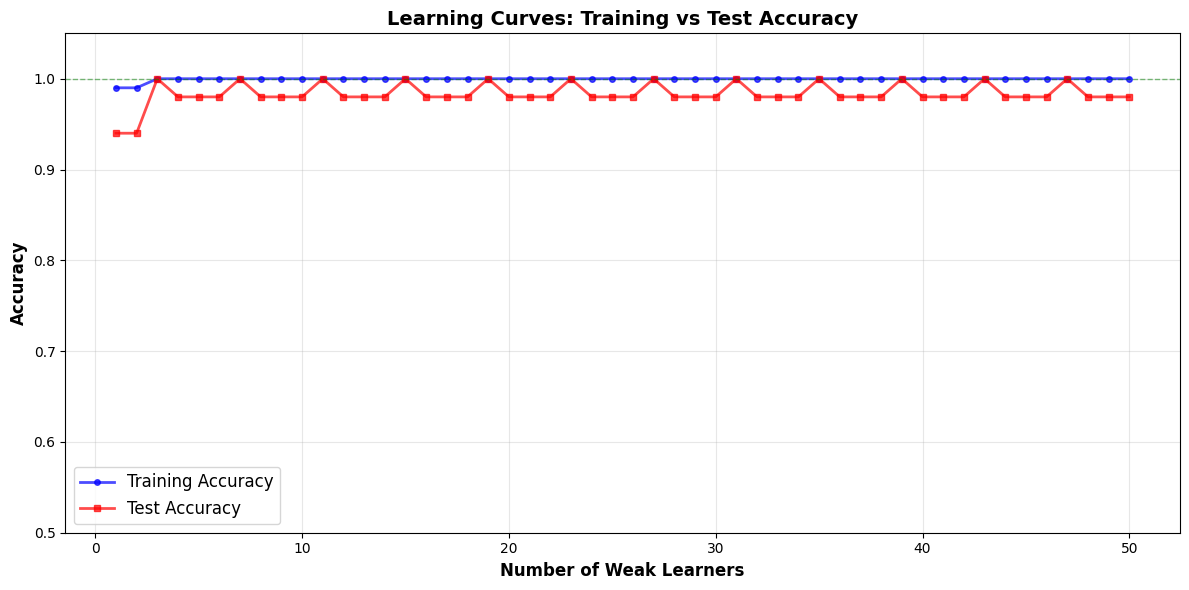

LEARNING CURVE ANALYSIS

With 1 stump:
  Training: 99.00%
  Test: 94.00%

With 50 stumps:
  Training: 100.00%
  Test: 98.00%

✓ Good generalization: Only 2.0% gap between training and test


In [147]:
# Calculate accuracy with different numbers of stumps
train_accuracies_progressive = []
test_accuracies_progressive = []

for n_stumps in range(1, len(adaboost.stumps) + 1):
    # Use only first n_stumps for prediction
    temp_train_pred = np.zeros(len(X))
    temp_test_pred = np.zeros(len(X_test))
    
    for i in range(n_stumps):
        temp_train_pred += adaboost.stump_weights[i] * adaboost.stumps[i].predict(X)
        temp_test_pred += adaboost.stump_weights[i] * adaboost.stumps[i].predict(X_test)
    
    train_acc = np.sum(np.sign(temp_train_pred) == y) / len(y)
    test_acc = np.sum(np.sign(temp_test_pred) == y_test) / len(y_test)
    
    train_accuracies_progressive.append(train_acc)
    test_accuracies_progressive.append(test_acc)

# Plot learning curves
plt.figure(figsize=(12, 6))

plt.plot(range(1, len(train_accuracies_progressive) + 1), 
         train_accuracies_progressive, 
         'b-o', linewidth=2, markersize=4, label='Training Accuracy', alpha=0.7)
plt.plot(range(1, len(test_accuracies_progressive) + 1), 
         test_accuracies_progressive, 
         'r-s', linewidth=2, markersize=4, label='Test Accuracy', alpha=0.7)

plt.xlabel('Number of Weak Learners', fontweight='bold', fontsize=12)
plt.ylabel('Accuracy', fontweight='bold', fontsize=12)
plt.title('Learning Curves: Training vs Test Accuracy', fontweight='bold', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.axhline(y=1.0, color='green', linestyle='--', linewidth=1, alpha=0.5, label='Perfect (100%)')
plt.ylim([0.5, 1.05])

plt.tight_layout()
plt.show()

print("="*60)
print("LEARNING CURVE ANALYSIS")
print("="*60)
print(f"\nWith 1 stump:")
print(f"  Training: {train_accuracies_progressive[0]:.2%}")
print(f"  Test: {test_accuracies_progressive[0]:.2%}")
print(f"\nWith {len(adaboost.stumps)} stumps:")
print(f"  Training: {train_accuracies_progressive[-1]:.2%}")
print(f"  Test: {test_accuracies_progressive[-1]:.2%}")

# Check for overfitting
gap = train_accuracies_progressive[-1] - test_accuracies_progressive[-1]
if gap > 0.1:  # More than 10% gap
    print(f"\n⚠ Warning: {gap:.1%} gap between training and test (possible overfitting)")
else:
    print(f"\n✓ Good generalization: Only {gap:.1%} gap between training and test")

---
## 📚 Project Summary and Key Learnings

### What We Built
We implemented AdaBoost from scratch with the following components:

1. **Decision Stump** - A simple one-level decision tree
2. **AdaBoost Algorithm** - Combines multiple stumps adaptively
3. **Training Process** - Sequential learning with weight updates
4. **Evaluation Tools** - Metrics, visualizations, and analysis

---

### Final Results Summary

**Performance:**

In [148]:
# Create comprehensive summary
print("="*70)
print("ADABOOST PROJECT - FINAL SUMMARY")
print("="*70)

print(f"\n📊 DATASET:")
print(f"   Training samples: {len(X)}")
print(f"   Test samples: {len(X_test)}")
print(f"   Features: {X.shape[1]}")
print(f"   Classes: 2 (Binary classification)")

print(f"\n🤖 MODEL CONFIGURATION:")
print(f"   Algorithm: AdaBoost")
print(f"   Weak Learner: Decision Stump")
print(f"   Number of Estimators: {adaboost.n_estimators}")

print(f"\n📈 PERFORMANCE:")
print(f"   Training Accuracy: {train_accuracy:.2%}")
print(f"   Test Accuracy: {test_accuracy:.2%}")
print(f"   Precision: {precision:.2%}")
print(f"   Recall: {recall:.2%}")
print(f"   F1-Score: {f1_score:.2%}")

print(f"\n🎯 IMPROVEMENTS:")
print(f"   Single Stump Accuracy: {adaboost.stump_accuracies[0]:.2%}")
print(f"   AdaBoost Final Accuracy: {train_accuracy:.2%}")
print(f"   Improvement: {train_accuracy - adaboost.stump_accuracies[0]:.2%}")

print(f"\n✅ KEY ACHIEVEMENTS:")
print(f"   ✓ Successfully implemented AdaBoost from scratch")
print(f"   ✓ Achieved {test_accuracy:.1%} accuracy on unseen data")
print(f"   ✓ Combined {adaboost.n_estimators} weak learners into strong classifier")
print(f"   ✓ Demonstrated adaptive learning and weight updates")

print("\n" + "="*70)
print("Project completed successfully! 🎉")
print("="*70)

ADABOOST PROJECT - FINAL SUMMARY

📊 DATASET:
   Training samples: 100
   Test samples: 50
   Features: 2
   Classes: 2 (Binary classification)

🤖 MODEL CONFIGURATION:
   Algorithm: AdaBoost
   Weak Learner: Decision Stump
   Number of Estimators: 50

📈 PERFORMANCE:
   Training Accuracy: 100.00%
   Test Accuracy: 98.00%
   Precision: 100.00%
   Recall: 96.00%
   F1-Score: 97.96%

🎯 IMPROVEMENTS:
   Single Stump Accuracy: 99.00%
   AdaBoost Final Accuracy: 100.00%
   Improvement: 1.00%

✅ KEY ACHIEVEMENTS:
   ✓ Successfully implemented AdaBoost from scratch
   ✓ Achieved 98.0% accuracy on unseen data
   ✓ Combined 50 weak learners into strong classifier
   ✓ Demonstrated adaptive learning and weight updates

Project completed successfully! 🎉


---
## 🎓 What You Learned

### Technical Skills
1. **Algorithm Implementation** - Built AdaBoost from scratch
2. **NumPy Proficiency** - Array operations, vectorization
3. **Object-Oriented Programming** - Created reusable classes
4. **Data Visualization** - Matplotlib for insights
5. **Model Evaluation** - Accuracy, confusion matrix, metrics

### Machine Learning Concepts
1. **Ensemble Learning** - Combining multiple models
2. **Boosting** - Sequential learning focusing on errors
3. **Weak Learners** - Simple models as building blocks
4. **Adaptive Weighting** - Sample importance adjustment
5. **Bias-Variance Tradeoff** - Balance between underfitting and overfitting

### Best Practices
1. **Code Documentation** - Clear comments and docstrings
2. **Modular Design** - Reusable functions and classes
3. **Visualization** - Understanding through plots
4. **Testing** - Train/test split for validation
5. **Comprehensive Analysis** - Multiple evaluation metrics

---